In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
class Graph:
  def __init__(self, archive):
    self.graph = nx.Graph()
    self.archive = archive

  def read_graph(self):
    with open(self.archive, "r") as f:
      for linea in f:
        nodo1, nodo2, peso_str = linea.strip().split()
        peso = int(peso_str)
        self.graph.add_edge(nodo1, nodo2, weight=peso)

    nodos = sorted(self.graph.nodes())
    num_nodos = len(nodos)

    # Inicializar la matriz con ceros
    self.adj_matrix = np.zeros((num_nodos, num_nodos), dtype=int)

    # Llenar la matriz con los valores de adyacencia
    for i, nodo1 in enumerate(nodos):
        for j, nodo2 in enumerate(nodos):
            if self.graph.has_edge(nodo1, nodo2):
                self.adj_matrix[i, j] = self.graph[nodo1][nodo2]['weight']
    print(self.adj_matrix)

    print(" ", end=" ")
    for nodo in nodos:
        print(nodo, end=" ")
    print()
    for i, fila in enumerate(self.adj_matrix):
        print(nodos[i], end=" ")
        for valor in fila:
            print(valor, end=" ")
        print()
    return self.graph

  def imprimir_graphs(self):
    print("Nodos:", list(self.graph.nodes()))
    print("Aristas:", list(self.graph.edges(data=True)))

  def mostrar_grafo(self):
    pos = nx.kamada_kawai_layout(self.graph)
    nx.draw(self.graph, with_labels=True, pos=pos)
    edge_labels = nx.get_edge_attributes(self.graph, 'weight')
    nx.draw_networkx_edge_labels(self.graph, pos=pos, edge_labels=edge_labels)

graph = Graph("/content/otro_grafo.txt")

In [ ]:
graph.read_graph()
graph.imprimir_graphs()

[[0 3 5 2 7 9]
 [3 0 1 6 8 8]
 [5 1 0 4 3 6]
 [2 6 4 0 2 7]
 [7 8 3 2 0 5]
 [9 8 6 7 5 0]]
  A C D E F H 
A 0 3 5 2 7 9 
C 3 0 1 6 8 8 
D 5 1 0 4 3 6 
E 2 6 4 0 2 7 
F 7 8 3 2 0 5 
H 9 8 6 7 5 0 
Nodos: ['A', 'D', 'C', 'E', 'F', 'H']
Aristas: [('A', 'D', {'weight': 5}), ('A', 'C', {'weight': 3}), ('A', 'E', {'weight': 2}), ('A', 'F', {'weight': 7}), ('A', 'H', {'weight': 9}), ('D', 'C', {'weight': 1}), ('D', 'E', {'weight': 4}), ('D', 'F', {'weight': 3}), ('D', 'H', {'weight': 6}), ('C', 'E', {'weight': 6}), ('C', 'F', {'weight': 8}), ('C', 'H', {'weight': 8}), ('E', 'F', {'weight': 2}), ('E', 'H', {'weight': 7}), ('F', 'H', {'weight': 5})]


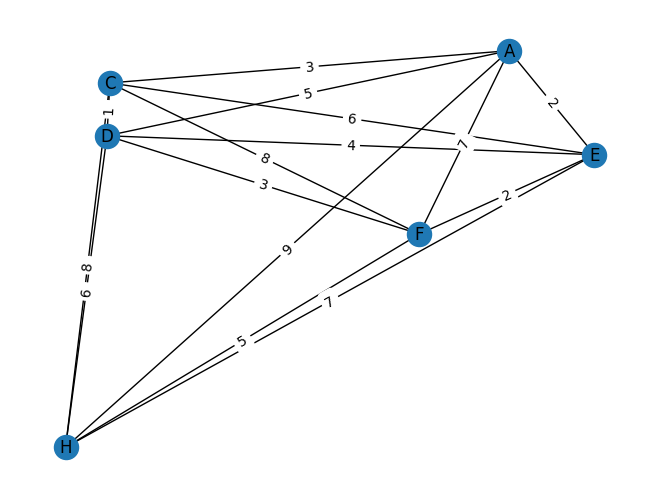

In [ ]:
graph.mostrar_grafo()

In [ ]:
matrix = graph.adj_matrix

In [ ]:
matrix

array([[0, 3, 5, 2, 7, 9],
       [3, 0, 1, 6, 8, 8],
       [5, 1, 0, 4, 3, 6],
       [2, 6, 4, 0, 2, 7],
       [7, 8, 3, 2, 0, 5],
       [9, 8, 6, 7, 5, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


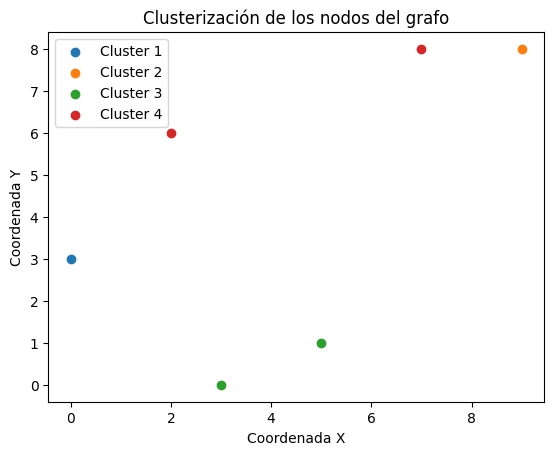

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
coordenadas_normalizadas = scaler.fit_transform(matrix)

# Instanciar un modelo de KMeans
kmeans = KMeans(n_clusters=4)

# Entrenar el modelo
kmeans.fit(coordenadas_normalizadas)


# Visualizar los datos
for cluster in range(4):
    plt.scatter(
        matrix[kmeans.labels_ == cluster, 0],
        matrix[kmeans.labels_ == cluster, 1],
        label=f'Cluster {cluster + 1}'
    )

plt.title('Clusterización de los nodos del grafo')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.show()


In [ ]:
d = matrix
tau = np.ones(d.shape)
tau_d = np.zeros(d.shape)
neta = 1/d

alpha = 1
beta = 1
rho = 0.5
max_iters = 20
ants = 100

initial_state = 0


for iter in range(max_iters):
  paths = []
  for ant in range(ants):
    path = []
    unvisited = [i for i in range(d.shape[0])]
    idx = initial_state
    unvisited.remove(idx)
    path.append(idx)
    while len(unvisited) != 0:
      w = tau**alpha * neta**beta
      w = w[unvisited]
      p = w/sum(w)
      idx = np.random.choice(unvisited, p=p[:,idx])
      unvisited.remove(idx)
      path.append(idx)
    path.append(initial_state)
    dt = 0
    for i in range(len(path)-1):
      dt += d[path[i], path[i+1]]
    dp = 1/dt
    for i in range(len(path)-1):
      tau_d[path[i], path[i+1]] += dp
      tau_d[path[i+1], path[i]] += dp
    paths.append(path)
    #print(f"Ant {ant} path: {path}. Total distance: {dt}. Total pheromones: {dp}")
  tau = (1 - rho) * tau + tau_d
  #print("Iteración:", iter)

<ipython-input-8-fdc46aa116fa>:4: RuntimeWarning: divide by zero encountered in divide
  neta = 1/d
<ipython-input-8-fdc46aa116fa>:26: RuntimeWarning: invalid value encountered in divide
  p = w/sum(w)


In [ ]:
from collections import Counter
print(Counter(["".join([str(i) for i in path]) for path in paths]))

Counter({'0342150': 32, '0124350': 14, '0345120': 7, '0345210': 6, '0354210': 5, '0512430': 3, '0342510': 3, '0351240': 3, '0543210': 3, '0534210': 3, '0524310': 2, '0341250': 2, '0124530': 2, '0215340': 1, '0312450': 1, '0321450': 1, '0352140': 1, '0154230': 1, '0321540': 1, '0435210': 1, '0431250': 1, '0215430': 1, '0214350': 1, '0421530': 1, '0453120': 1, '0521340': 1, '0134250': 1, '0213450': 1})


In [ ]:
#Ruta mas optima
best_path = None
best_distance = float('inf')

for path in paths:
        distance = sum(d[path[i], path[i+1]] for i in range(len(path)-1))
        if distance < best_distance:
            best_distance = distance
            best_path = path
print("La mejor ruta encontrada:", best_path)
print("Distancia total de la mejor ruta:", best_distance)

La mejor ruta encontrada: [0, 3, 4, 5, 2, 1, 0]
Distancia total de la mejor ruta: 19


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

ruta_base= "/content/drive/MyDrive/"
problemset = pd.read_excel(ruta_base + "/problemset/problemset.xlsx")

nodes_path = [ruta_base + path for path in problemset['nodes'][:16]]
matrix_path = [ruta_base + path for path in problemset['distance_matrix'][:16]]

nodes = [pd.read_parquet(path) for path in nodes_path]
#distance_matrix = [pd.read_parquet(path) for path in matrix_path]
capacity = [i for i in problemset['vehicle_capacity']]

# Leer las matrices de distancia
distance_matrix = [pd.read_parquet(path) for path in matrix_path]

# Convertir las matrices de distancia a arrays de numpy
distance_arrays = [np.array(matrix) for matrix in distance_matrix]
distance_arrays_flattened = [matrix.reshape(-1) for matrix in distance_arrays]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Matriz 1 está en el cluster 1
Matriz 2 está en el cluster 1
Matriz 3 está en el cluster 1
Matriz 4 está en el cluster 1
Matriz 5 está en el cluster 1
Matriz 6 está en el cluster 0
Matriz 7 está en el cluster 0
Matriz 8 está en el cluster 0
Matriz 9 está en el cluster 0
Matriz 10 está en el cluster 0
Matriz 11 está en el cluster 0
Matriz 12 está en el cluster 2
Matriz 13 está en el cluster 3
Matriz 14 está en el cluster 3
Matriz 15 está en el cluster 3
Matriz 16 está en el cluster 3


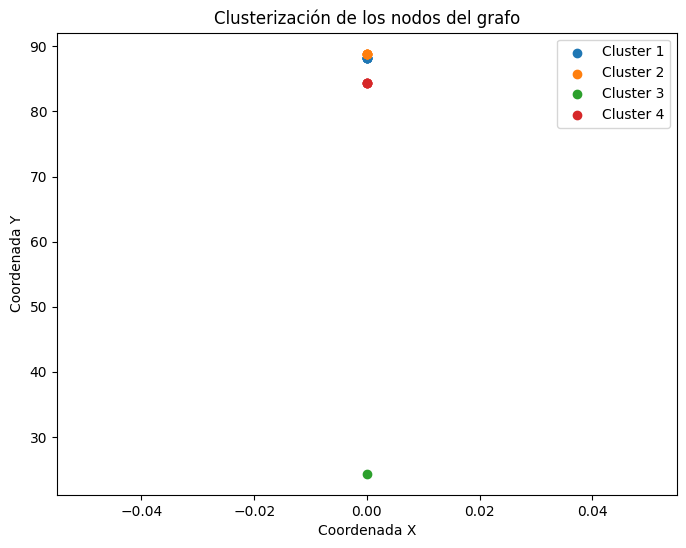

In [ ]:
scaler = StandardScaler()
normalizacion = scaler.fit_transform(distance_arrays_flattened, capacity)
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(distance_arrays_flattened)

for i, cluster in enumerate(clusters):
    print(f"Matriz {i+1} está en el cluster {cluster}")

# Convertir las listas a arrays de numpy
distance_arrays_flattened = np.array(distance_arrays_flattened)
clusters = np.array(clusters)
plt.figure(figsize=(8, 6))

for cluster in range(4):
    plt.scatter(
        distance_arrays_flattened[kmeans.labels_ == cluster, 0],
        distance_arrays_flattened[kmeans.labels_ == cluster, 1],
        label=f'Cluster {cluster + 1}'
    )

plt.title('Clusterización de los nodos del grafo')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.show()

In [ ]:
d = distance_arrays_flattened
tau = np.ones(d.shape)
tau_d = np.zeros(d.shape)
neta = 1/d

alpha = 1
beta = 1
rho = 0.5
max_iters = 20
ants = 100

initial_state = 0


for iter in range(max_iters):
  paths = []
  for ant in range(ants):
    path = []
    unvisited = [i for i in range(d.shape[0])]
    idx = initial_state
    unvisited.remove(idx)
    path.append(idx)
    while len(unvisited) != 0:
      w = tau**alpha * neta**beta
      w = w[unvisited]
      w[np.isinf(w)] = 1e9
      p = w/sum(w)
      idx = np.random.choice(unvisited, p=p[:,idx])
      unvisited.remove(idx)
      path.append(idx)
    path.append(initial_state)
    dt = 0
    for i in range(len(path)-1):
      dt += d[path[i], path[i+1]]
    dp = 1/dt
    for i in range(len(path)-1):
      tau_d[path[i], path[i+1]] += dp
      tau_d[path[i+1], path[i]] += dp
    paths.append(path)
    #print(f"Ant {ant} path: {path}. Total distance: {dt}. Total pheromones: {dp}")
  tau = (1 - rho) * tau + tau_d

<ipython-input-14-1f3ac5d3160d>:4: RuntimeWarning: divide by zero encountered in divide
  neta = 1/d


In [ ]:
from collections import Counter
print(Counter(["".join([str(i) for i in path]) for path in paths]))

Counter({'07841215141110136152930': 1, '01595121111014476821330': 1, '01214384721011911365150': 1, '03115971128414512136100': 1, '04151182967131051231140': 1, '01261025118113141597340': 1, '01011112157396841413250': 1, '03613414122911181075150': 1, '01112414510679213183150': 1, '09513362841210117141150': 1, '01129710651128341514130': 1, '01141251673829151013140': 1, '01151413691028121574130': 1, '01011131441572912138650': 1, '03965131141214101518270': 1, '06310117144121582113590': 1, '01138113105156972124140': 1, '01251539184101172613140': 1, '03961213182711415514100': 1, '03967113112101551214480': 1, '04101315113768121214590': 1, '01143691584121110135270': 1, '08211412795133101561140': 1, '01113106384121579251410': 1, '03104827614115131121590': 1, '01511281131251436109740': 1, '01312103911682514471510': 1, '02915111412131673845100': 1, '01497410155121638213110': 1, '05131441211961510283710': 1, '01028413512141573691110': 1, '09116107384251412151130': 1, '05371114296101813121540': 1, '

In [ ]:
#Ruta mas optima
best_path = None
best_distance = float('inf')

for path in paths:
        distance = sum(d[path[i], path[i+1]] for i in range(len(path)-1))
        if distance < best_distance:
            best_distance = distance
            best_path = path
print("La mejor ruta encontrada:", best_path)
print("Distancia total de la mejor ruta:", best_distance)

La mejor ruta encontrada: [0, 11, 1, 10, 2, 13, 12, 14, 5, 15, 6, 9, 4, 8, 3, 7, 0]
Distancia total de la mejor ruta: 607.3924634727077


In [ ]:
best_paths = []  # Lista para almacenar las mejores rutas
num_best_paths = 16  # Número de mejores rutas que deseas encontrar

for path in paths:
    distance = sum(d[path[i], path[i+1]] for i in range(len(path)-1))
    # Agregar la ruta y su distancia a la lista de las mejores rutas
    best_paths.append((path, distance))

# Ordenar las mejores rutas según la distancia
best_paths.sort(key=lambda x: x[1])

print("Las mejores 16 rutas encontradas:")
for i in range(min(num_best_paths, len(best_paths))):
    print("Ruta:", best_paths[i][0])
    print("Distancia total de la ruta:", best_paths[i][1])
    print("------------------------")

Las mejores 16 rutas encontradas:
Ruta: [0, 11, 1, 10, 2, 13, 12, 14, 5, 15, 6, 9, 4, 8, 3, 7, 0]
Distancia total de la ruta: 607.3924634727077
------------------------
Ruta: [0, 13, 12, 14, 4, 8, 1, 9, 11, 5, 3, 7, 2, 6, 15, 10, 0]
Distancia total de la ruta: 635.8428259088996
------------------------
Ruta: [0, 11, 5, 15, 1, 10, 6, 7, 2, 14, 12, 13, 4, 8, 3, 9, 0]
Distancia total de la ruta: 657.8251199349249
------------------------
Ruta: [0, 10, 11, 13, 12, 14, 4, 8, 3, 6, 7, 2, 9, 15, 5, 1, 0]
Distancia total de la ruta: 658.1843211859277
------------------------
Ruta: [0, 11, 12, 4, 14, 5, 10, 6, 7, 9, 2, 13, 1, 8, 3, 15, 0]
Distancia total de la ruta: 659.6703548815918
------------------------
Ruta: [0, 10, 11, 7, 2, 12, 13, 8, 1, 14, 5, 6, 3, 9, 15, 4, 0]
Distancia total de la ruta: 674.3883532908255
------------------------
Ruta: [0, 1, 11, 14, 4, 15, 10, 3, 8, 2, 9, 13, 12, 5, 7, 6, 0]
Distancia total de la ruta: 676.1700503457795
------------------------
Ruta: [0, 9, 13, 4, 1